<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto1/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Sobre a cidade
<center><img src="https://blog.descubraomundo.com/wp-content/uploads/2014/05/barcelona_parcguell2.jpg" alt="A cidade de Barcelona, vista por uma de suas atrações turísticas mais conhecidas, o Parque Guell">
</center>

A cidade de Barcelona, capital da Catalunha, uma das regiões autônomas da Espanha, passou a ser um destino turístico muito procurado após a realização dos Jogos Olímpicos de 1992. Atualmente, a cidade possui cerca de 1,6 milhão de habitantes e chegou a [receber](https://es.ara.cat/sociedad/barcelona/vuelve-barcelona-12-millones-turistas_130_4350175.html) mais de 12 milhões de turistas em 2019.  
No entanto, o alto número de turistas pareceu incomodar os habitantes locais, que começaram a reclamar, principalmente, dos altos custos de moradia. Com isto, em 6 de agosto de 2021, entrou em vigor uma nova lei que proibiu os alugueis de curto prazo para acomodações privadas, sendo, no entanto, permitido o aluguel de imóveis inteiros (Ver [notícia](https://www.hoteliernews.com.br/barcelona-muda-regras-e-atinge-em-cheio-o-airbnb/)). Esta lei atingiu em cheio o AirBnb.
Com isso, também tentaremos analisar o impacto que esta lei provocou na oferta de imóveis para locação.

## Obtenção dos Dados
Os dados que iremos utilizar aqui foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).  
Para esta análise foi utilizada apenas um arquivo contendo os dados resumidos das acomodações.




In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2022-09-10/visualisations/listings.csv",quotechar='"')


## Análise dos Dados


**Dicionário das variáveis**

* **id:** Código único do AirBnb  
* **name:** Nome do imóvel anunciado  
* **host_id**: ID do anfitrião
* **host_name**: nome do anfitrião
* **neighbourhood_group**: Dependendo da cidade, pode ser bairro, distrito, zona ou mesmo pode estar em branco. Particularmente para a cidade de Barcelona corresponde a um de seus <a href="https://pt.wikipedia.org/wiki/Barcelona#Subdivisões" target="_blank">10 distritos</a>.
* **neighbourhood**: Está em um nível hierárquico inferior ao de **neighbourhood_group**. Dependendo da cidade, pode ser bairro, sub-bairro, setor ou distrito. Para a cidade de Barcelona corresponde a bairros.
* **latitude**: latitude do imóvel. É um valor positivo para localidades no hemisfério norte e negativo para localidades no hemisfério sul.
* **longitude**: longitude do imóvel. É um valor positivo para localidades ao leste do Meridiano de Greenwich e negativo para localidades a oeste.
* **room_type**: tipo de imóvel ou quarto.
* **price**: Preço do imóvel em moeda local.
* **minimum_nights**: número mínimo de noites para permanência
* **number_of_reviews**: número de reviews do imóvel
* **last_review**: data do último review
* **reviews_per_month**: quantidade média de reviews por mês
* **calculated_host_listings_count**: Quantidade de imóveis do mesmo anfitrião  
* **availability_365**: Quantidade de dias que o imóvel está disponível em um ano
* **number_of_reviews_ltm**: Número de reviews nos últimos 12 meses
* **license**: número de licença do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 10 primeiras entradas.

In [ ]:
# mostrar as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
1,44192271,Cozy terrace apartment\nApartamento con patio,200754964,Nuria,Les Corts,la Maternitat i Sant Ramon,41.372630,2.113180,Entire home/apt,110,3,54,2022-08-26,2.45,1,151,40,HUTB-013294
2,196021,"Large patio, 4 baths (3 en-suite), 19th c, cen...",953719,Julia,Eixample,l'Antiga Esquerra de l'Eixample,41.388420,2.161080,Entire home/apt,386,4,316,2022-08-12,2.37,1,238,45,HUTB-506707
3,196196,✨Large Apt near Sagrada Familia / Shared terrace✨,567180,Sandra,Eixample,la Sagrada Família,41.406600,2.174590,Entire home/apt,245,2,103,2022-08-10,0.77,19,22,11,HUTB-000325
4,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,180,1,30,2022-08-29,0.27,38,60,9,HUTB-002062
5,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.220630,Entire home/apt,230,5,62,2022-07-23,0.44,2,84,10,HUTB005057
6,17039441,Apart. full equipped. 2 min to Subway lines L1...,114340651,Pepa,Sants-Montjuïc,Sants - Badal,41.366400,2.116860,Entire home/apt,86,3,145,2022-09-06,2.15,1,218,34,NaN
7,197267,Cozy Studio in Gracia Neighborhood,632830,"M Angeles, Federico",Gràcia,la Vila de Gràcia,41.406610,2.151150,Entire home/apt,31,31,352,2022-09-01,2.69,4,59,6,HUTB01295238
8,553559871868002337,"8 lacus, VICTORIA",442972056,Maria,Sants-Montjuïc,Sants - Badal,41.371880,2.122200,Entire home/apt,110,2,10,2022-07-18,1.52,8,106,10,HUTB-009880
9,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,140,2,74,2022-08-10,0.54,3,287,11,HUTB-001722


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Quantidade de entradas:\t {}".format(df.shape[0]))
print("Quantidade de colunas:\t {}".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Quantidade de entradas:	 16920
Quantidade de colunas:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           0.314894
reviews_per_month                 0.213593
last_review                       0.213593
name                              0.000591
host_name                         0.000118
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

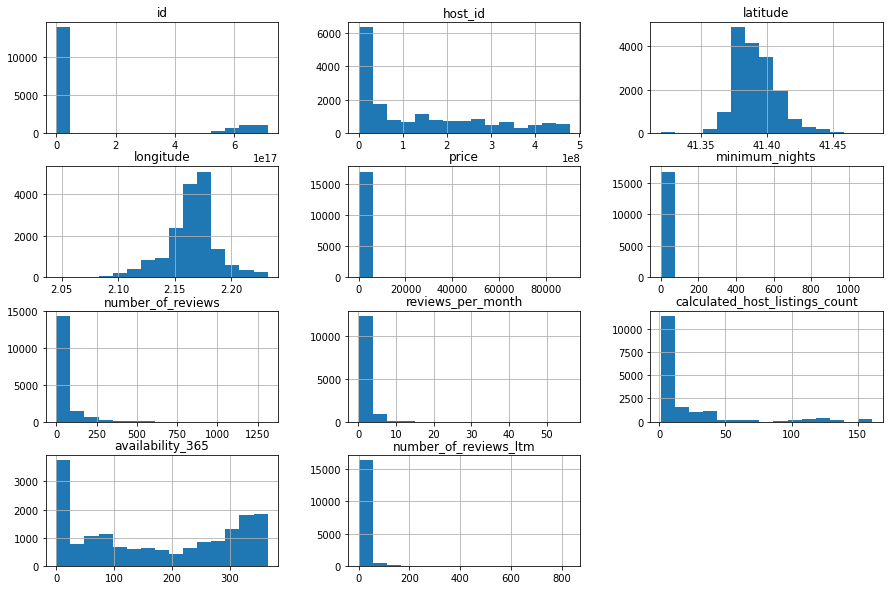

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

172.9147754137116

### Q5. Há outliers presentes?

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16920.000000,16920.000000,16920.000000,13306.000000,16920.000000,16920.000000
mean,172.914775,13.270449,41.029137,1.415639,19.506619,170.815012
std,927.545812,30.233280,77.338621,1.790187,35.142606,132.341829
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.250000,1.000000,39.000000
50%,100.000000,3.000000,7.000000,0.890000,4.000000,164.000000
75%,191.000000,31.000000,44.000000,2.030000,20.000000,308.000000
max,90000.000000,1124.000000,1311.000000,56.130000,161.000000,365.000000


Analisando as colunas *price* e *minimum_nights*, verfica=se que 75% das acomodações listadas, o preço do aliguel é inferior a 175 euros, porém o valor máximo do do aluguel chega a 90 mil euros! Da mesma forma, em 75% delas, o mínimo de noites é inferior a 31 dias, mas o máximo chega 1124 noites!  
Vamos analisar os box-plots para as duas variáveis acima.

#### Boxplot para 'price'


price: valores acima de 2500
50 entradas
0.3960%


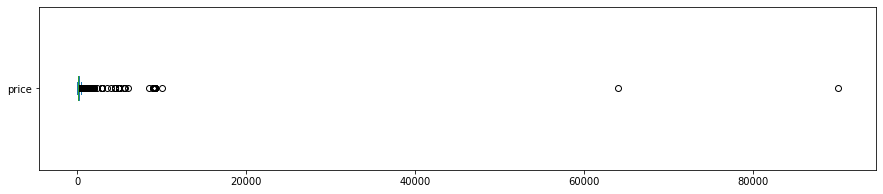

In [ ]:
df.price.plot(kind='box',vert=False, figsize=(15,3))
# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 2500")
print("{} entradas".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### Box-plot para 'minimum_nights'


minimum_nights: valores acima de 50
302 entradas
1.7849%


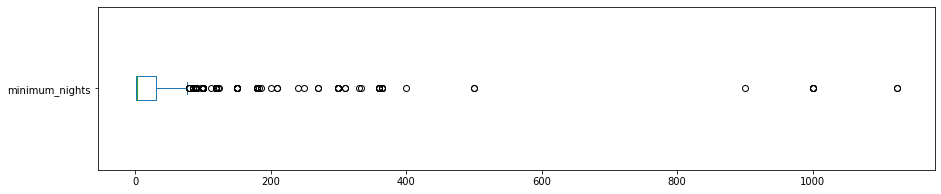

In [ ]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
# ver quantidade de valores acima de 30 para minimum_nights
print("\nminimum_nights: valores acima de 50")
print("{} entradas".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))


### Eliminando os outliers


In [3]:
# Estudando possiveis valores limite para se definir outliers
#Abordagem 1: definir outlier como aqueles valores superiores ao limite definido como Q3 + 1.5*(Q3-Q1), onde Q1 é o primeiro quartil e Q3 é o terceiro quartil
upper_fence_price =  2.5* 191.0 - 1.5*50.0 #Expandindo-se a fórmula acima, chega-se a 2.5*Q3 - 1.5*Q1
upper_fence_min_nights = 2.5*31 - 1.5
# Obtendo a porcentagem de registros cujos valores de 'price' e de 'min_nights' sejam superiores aos limites acima
print("Price: valores acima de {}", upper_fence_price)
print("{} entradas".format(len(df[df.price > upper_fence_price])))
print("{:.4f}%".format((len(df[df.price > upper_fence_price]) / df.shape[0])*100))
print("\n")
print("Mininimum nigths: valores acima de {}", upper_fence_min_nights)
print("{} entradas".format(len(df[df.minimum_nights > upper_fence_min_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > upper_fence_min_nights]) / df.shape[0])*100))


Price: valores acima de {} 402.5
731 entradas
4.3203%


Mininimum nigths: valores acima de {} 76.0
196 entradas
1.1584%


In [4]:
#Abordagem 2: definir outlier como sendo um valor no qual 99% dos registros são inferiores a ele. Este valor vem do fato de que em uma distribuição normal
#cerca de 99% dos valores estão até 3 desvios padrão de distância da média
price_99 = df.price.quantile(0.99)
min_nights_99 = df.minimum_nights.quantile(0.99)
print("Quantil de 99% p/ price: {:.2f}:".format(price_99))
print("Quantil de 99% p/ min_nights: {}".format(min_nights_99))

Quantil de 99% p/ price: 1013.77:
Quantil de 99% p/ min_nights: 90.0


#### Eliminando-se os outliers


Total de registros filtrados: 364


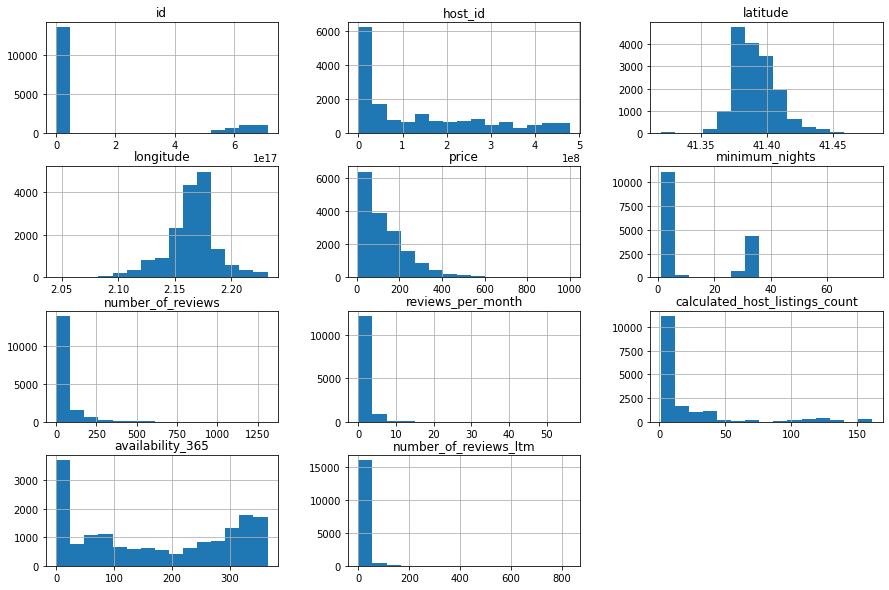

In [5]:
df_clean = df.copy()

#como há uma quantidade significativa de perços fora do limite superior pela fórumula tradicional da estatística descritiva
#optei por filtrar somente os valores que estão acima de 1% do topo
df_clean.drop(df_clean[df_clean.price > price_99].index,axis=0,inplace=True)
#df_clean.drop(df_clean[df_clean.price > upper_fence_price].index,axis=0,inplace=True)
#quanto ao mímino de noites, optei pela fórmula, pois poucos registros estão acima de 76 noites
df_clean.drop(df_clean[df_clean.minimum_nights > upper_fence_min_nights].index,axis=0,inplace=True)
#eliminando os registros com preço zerado
df_clean.drop(df_clean[df_clean.price == 0.0].index,axis=0,inplace=True)
print("Total de registros filtrados: {}".format(df.shape[0] - df_clean.shape[0]) )

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));



### **Q6. Qual a correlação existente entre as variáveis**

In [6]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.313473,0.081879,0.048903,0.239592,0.250512
minimum_nights,-0.313473,1.000000,-0.181173,-0.216099,0.007217,0.056001
number_of_reviews,0.081879,-0.181173,1.000000,0.475744,-0.105269,0.054305
reviews_per_month,0.048903,-0.216099,0.475744,1.000000,-0.088476,0.140756
calculated_host_listings_count,0.239592,0.007217,-0.105269,-0.088476,1.000000,0.135391
availability_365,0.250512,0.056001,0.054305,0.140756,0.135391,1.000000


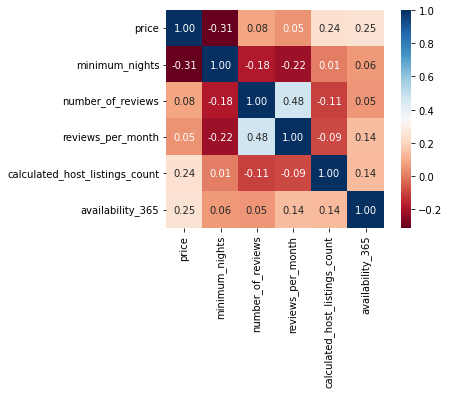

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap="RdBu",fmt=".2f",square=True,linecolor='white',annot=True)

In [9]:
#Estranhamente, parece não haver correlação entre o preço e o mínimo de noites. Criemos uma coluna chama 'price_per_night que será igual a
# price / minimum_nights
df_clean["price_per_night"] = df["price"]/df["minimum_nights"]
df_clean[["name","neighbourhood_group","neighbourhood","price","minimum_nights","price_per_night"]].head(20)

,name,neighbourhood_group,neighbourhood,price,minimum_nights,price_per_night
0,Habitación muy acogedora.,Sants-Montjuïc,la Bordeta,59,1,59.000000
1,Cozy terrace apartment\nApartamento con patio,Les Corts,la Maternitat i Sant Ramon,110,3,36.666667
2,"Large patio, 4 baths (3 en-suite), 19th c, cen...",Eixample,l'Antiga Esquerra de l'Eixample,386,4,96.500000
3,✨Large Apt near Sagrada Familia / Shared terrace✨,Eixample,la Sagrada Família,245,2,122.500000
4,Huge flat for 8 people close to Sagrada Familia,Eixample,la Sagrada Família,180,1,180.000000
5,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,Sant Martí,el Besòs i el Maresme,230,5,46.000000
6,Apart. full equipped. 2 min to Subway lines L1...,Sants-Montjuïc,Sants - Badal,86,3,28.666667
7,Cozy Studio in Gracia Neighborhood,Gràcia,la Vila de Gràcia,31,31,1.000000
8,"8 lacus, VICTORIA",Sants-Montjuïc,Sants - Badal,110,2,55.000000
9,Sagrada Familia area - Còrsega 1,Gràcia,el Camp d'en Grassot i Gràcia Nova,140,2,70.000000


In [ ]:
#Exibe um sumário da coluna 'price_per_night'
df_clean["price_per_night"].describe()


count    16003.000000
mean        65.939345
std         83.266964
min          0.200000
25%          3.158770
50%         35.000000
75%         90.000000
max        402.000000
Name: price_per_night, dtype: float64

In [10]:
print("Porcentagem de imóveis permanência mínima superior a 20 noites: {:.4f}".format(100*df_clean[df_clean["minimum_nights"] > 20].shape[0]/df_clean.shape[0]))
print("Porcentagem de imóveis com preço por noite inferior a 10 euros: {:.4f}".format(100*df_clean[df_clean["price_per_night"] < 10.0].shape[0]/df_clean.shape[0]))

Porcentagem de imóveis permanência mínima superior a 20 noites: 30.9133
Porcentagem de imóveis com preço por noite inferior a 10 euros: 32.5018


A proporção entre imóveis com período de estada longo e de imóveis com baixo preço por noite é bem semelhante. Provavelmente se trata de uma forma de escapar da lei que restringe a locação de curto prazo de quartos privados.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
dRoomType =  df_clean.room_type.value_counts()
print(dRoomType)

pandas.core.series.Series

Text(0.5, 0, 'Quantidade')

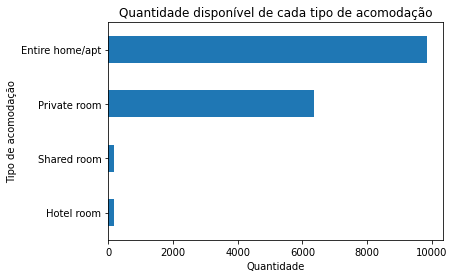

In [ ]:
#Exibindo o gráfico de distribuição dos tipos de acomodação
dRoomType.sort_values().plot.barh()
plt.title("Quantidade disponível de cada tipo de acomodação")
plt.ylabel("Tipo de acomodação")
plt.xlabel("Quantidade")

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()*100/df.shape[0]

Entire home/apt    58.274232
Private room       37.535461
Shared room         1.034279
Hotel room          1.010638
Name: room_type, dtype: float64

Vamos verificar se existe registro de quartos individuais, com período de locação curto, o que é proibido pela lei que foi aprovada em 2021.

In [ ]:
df_clean[(df_clean.room_type == "Private room") &  (df_clean.minimum_nights <7)].shape[0]

4287

In [ ]:
df_clean[(df_clean.room_type == "Private room") &  (df_clean.minimum_nights <7)].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,Habitación muy acogedora.,51421682,Maria Das Merces,Sants-Montjuïc,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.00,1,351,9,Exempt
26,214970,Single Cozy Room in central flat Barcelona,1110014,Janeth,Sants-Montjuïc,el Poble Sec,41.370420,2.164110,Private room,19,5,152,2022-08-23,1.22,1,270,8,NaN
28,709162172220879194,Bedroom in a sun-filled duplex w/ terrace,171499055,Amélie,Les Corts,la Maternitat i Sant Ramon,41.369667,2.114618,Private room,36,2,0,NaN,NaN,1,340,0,Exempt
63,32250269,Suite en casa privada con piscina en San Justo.,242046364,Gabriel,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",41.387790,2.078410,Private room,100,2,58,2022-08-29,1.45,2,9,20,Exempt
83,32253124,Explore Barcelona From Suite in a Brilliant Po...,242046364,Gabriel,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",41.387970,2.078910,Private room,100,2,56,2022-09-06,1.31,2,19,22,Exempt
88,680292816789688100,Habitación cerca del aeropuerto y del centro,471841596,Jesus,Sants-Montjuïc,la Marina de Port,41.359796,2.125766,Private room,33,1,10,2022-09-04,6.98,2,318,10,Exempt
95,128463,Private Suite in residential area!!,635253,Sebastian,Sants-Montjuïc,Sants,41.371550,2.136640,Private room,61,3,334,2022-09-06,2.49,1,323,43,HUTB-012603
104,36880106,"Privat room, near airport,two stops in Barcelona",277140770,Tekle,Sants-Montjuïc,la Bordeta,41.363420,2.127280,Private room,43,3,104,2022-09-08,2.72,1,3,58,Exempt
121,153376,Single room. central and quite,737399,Omar,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386150,2.176360,Private room,67,3,20,2022-09-04,0.50,1,0,13,NaN
146,323854,Casa Sagrada Familia Bcn Doubleroom,1657312,Alberto,Eixample,la Sagrada Família,41.408430,2.174940,Private room,30,1,21,2014-07-29,0.16,1,0,0,NaN


São listadas quase 4300 acomodações satisfazendo as condições acima, muitas possuindo reviews recentes, o que indica que tais quartos ainda estão disponíveis para alocação.

### **Q8. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
group_neighbour = df_clean.groupby(["neighbourhood"])
group_neighbour_gp = df_clean.groupby(["neighbourhood_group","neighbourhood"])
group_neighbour_gp.price.mean().sort_values(ascending=False)[:15]


neighbourhood_group  neighbourhood                               
Eixample             la Dreta de l'Eixample                          207.215400
Sant Martí           Diagonal Mar i el Front Marítim del Poblenou    205.900000
                     la Vila Olímpica del Poblenou                   200.104895
Eixample             l'Antiga Esquerra de l'Eixample                 164.497027
                     Sant Antoni                                     158.382465
                     la Sagrada Família                              151.007392
Sarrià-Sant Gervasi  Sant Gervasi - Galvany                          150.210863
Eixample             el Fort Pienc                                   146.080899
Horta-Guinardó       Sant Genís dels Agudells                        144.428571
Sant Martí           el Parc i la Llacuna del Poblenou               143.211765
                     el Poblenou                                     140.150418
Sants-Montjuïc       Hostafrancs                      

Exibindo um gráfico com as localidades mais caras de Barcelona:

Text(0, 0.5, 'Bairro')

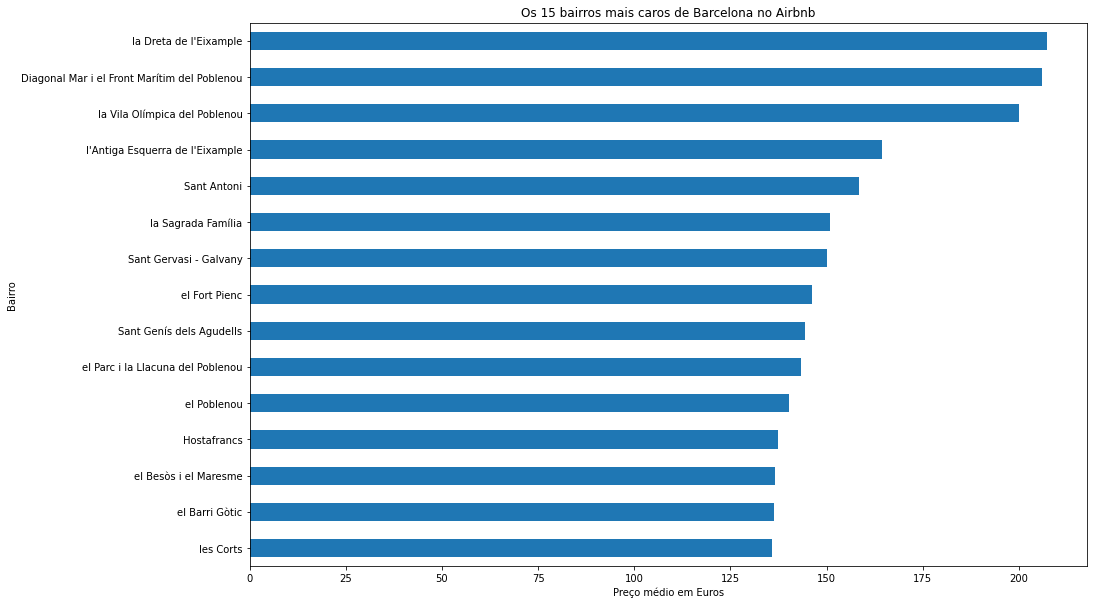

In [ ]:
#Exibindo um gráfico dos bairros mais caros da cidade
df_group_neighbour =  group_neighbour.price.mean().sort_values(ascending=False)[:15]
df_group_neighbour.sort_values().plot.barh( figsize=(15,10))
plt.title("Os 15 bairros mais caros de Barcelona no Airbnb")
plt.xlabel("Preço médio em Euros")
plt.ylabel("Bairro")


In [ ]:
#examinando os preços por noite
group_neighbour_gp.price_per_night.mean().sort_values(ascending=False)[:15]


neighbourhood_group  neighbourhood                               
Sant Martí           Diagonal Mar i el Front Marítim del Poblenou    136.578501
Eixample             la Dreta de l'Eixample                          128.810040
Sant Martí           la Vila Olímpica del Poblenou                   107.682590
Eixample             l'Antiga Esquerra de l'Eixample                 102.026165
                     Sant Antoni                                      90.139008
                     la Sagrada Família                               85.556895
Sarrià-Sant Gervasi  Sant Gervasi - Galvany                           83.248813
Sants-Montjuïc       Hostafrancs                                      81.186914
Sant Martí           el Besòs i el Maresme                            80.950167
Sants-Montjuïc       la Bordeta                                       79.917856
Les Corts            les Corts                                        79.624542
Sarrià-Sant Gervasi  les Tres Torres                  

In [ ]:
#examimando as localidades com maior ofeta de imóveis
group_neighbour_ng_count =  group_neighbour_gp.price.count().sort_values(ascending=False)[:15]
print(group_neighbour_ng_count)

neighbourhood_group  neighbourhood                        
Eixample             la Dreta de l'Eixample                   1987
Ciutat Vella         el Raval                                 1181
                     el Barri Gòtic                           1031
Eixample             la Sagrada Família                        947
Gràcia               la Vila de Gràcia                         943
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera     911
Eixample             l'Antiga Esquerra de l'Eixample           841
                     Sant Antoni                               787
Sants-Montjuïc       el Poble Sec                              754
Eixample             la Nova Esquerra de l'Eixample            577
Les Corts            la Maternitat i Sant Ramon                507
Eixample             el Fort Pienc                             445
Sants-Montjuïc       Sants - Badal                             377
Sant Martí           el Poblenou                               359
Ciu

Plotando um gráfico com os bairros com a maior oferta de acomodações pelo Airbnb

Text(0, 0.5, 'Bairro')

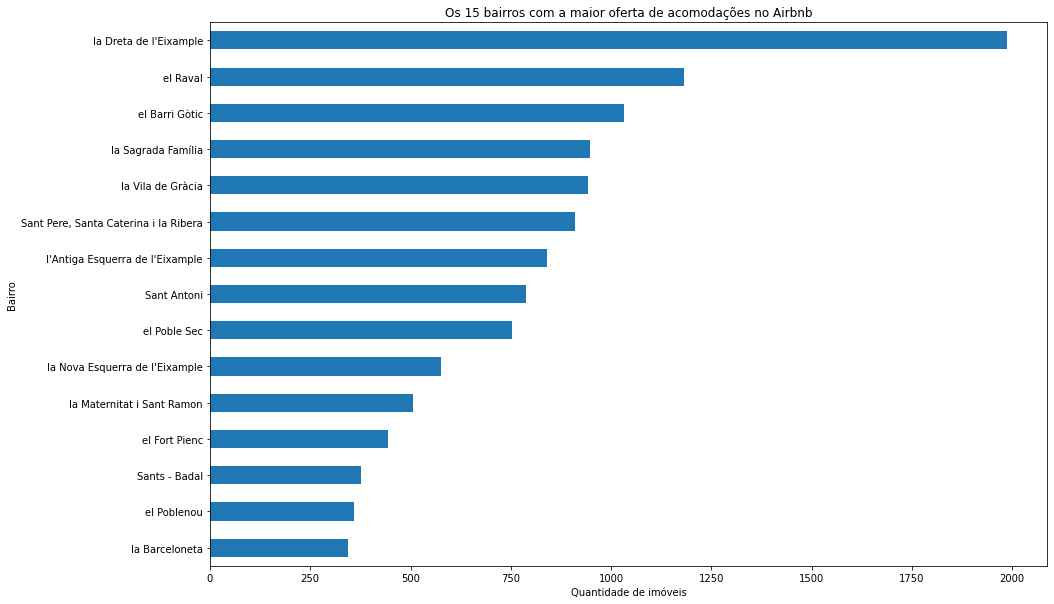

In [ ]:
group_neighbour_count = group_neighbour.price.count().sort_values(ascending=False)[:15]
group_neighbour_count.sort_values().plot.barh( figsize=(15,10))
plt.title("Os 15 bairros com a maior oferta de acomodações no Airbnb")
plt.xlabel("Quantidade de imóveis")
plt.ylabel("Bairro")

In [ ]:
#Verificando se existe alguma correlação entre preços e quantidade de imóveis ofertados
df2 = pd.DataFrame()
df2["mean"] = group_neighbour.price.mean()
df2["mean_pn"] = group_neighbour.price_per_night.mean()
df2["count"] = group_neighbour.price.count()
#df2.head(30)
cor = df2.corr()
display(cor)

,mean,mean_pn,count
mean,1.000000,0.902502,0.573482
mean_pn,0.902502,1.000000,0.579070
count,0.573482,0.579070,1.000000


### Plotando gráfico de latitude x longitude
Antes de plotar o gráfico segue abaixo um mapa contendo os distritos de Barcelona:  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Barcelona_districtes.svg/800px-Barcelona_districtes.svg.png?20080114211938" alt="Distritos de barcelona">

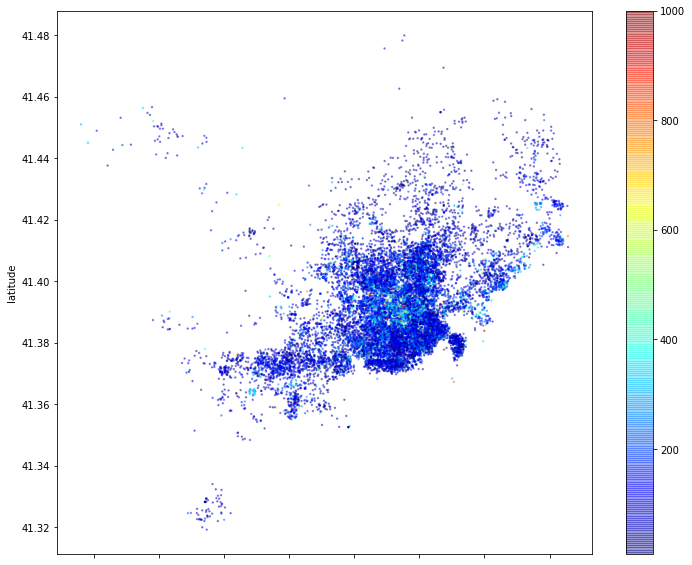

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=2,
              cmap=plt.get_cmap('jet'), figsize=(12,10));

### **Q9.Após remover os *outliers*, qual é a média do mínimo de noites para aluguel (minimum_nigths), do preço (price) e do preço por noite (price_per_night)?**

In [ ]:
# ver a média da coluna `minimum_nigths`
print("Média do mínimo de noites: {:.2f}".format(df_clean.minimum_nights.mean()))
#ver a média da coluna 'price'
print("Média do preço: {:.2f}".format(df_clean.price.mean()))
#ver a média da coluna 'price_per_night'
print("Média do preço por noite: {:.2f}".format(df_clean.price_per_night.mean()))


Média do mínimo de noites: 11.41
Média do preço: 137.82
Média do preço por noite: 75.87


## Conclusões


Após uma análise superficial, foi possível detectar a presença de *outliers* em diversas colunas, especialmente as colunas *price* e *minimum_nights*, nas quais foi dada uma ênfase maior neste processo de análise.  
Também foi estudada a relação entre preços e quantidade de imóveis e constatada que não há forte correção entre ambas as variáveis, tanto que a lista das localidades com os imóveis mais caros diverge razoavelmente da lista de locais com maior quantidade de imóveis ofertados.  
Ainda, foi feita uma breve análise do impacto da lei local que restringe o aluguel de curto prazo de quartos privados e constatou-se que ainda existem ofertas destes, no Airbnb. Além disso foi detectada a presença de acodações com aluguel de longo prazo tendo preços por noite ridiculamente baixos, o que evidencia ser uma forma de burlar a lei.  
Uma rápida pesquisa na Wikipedia permitiu concluir que os distritos com os imóvies mais caros na média ([Eixample](https://es.wikipedia.org/wiki/Distrito_del_Ensanche) e [Sant Martí](https://es.wikipedia.org/wiki/Distrito_de_San_Martín_(Barcelona))), são aqueles com maior população e com um grande número de atrações turísticas.